In [1]:
import numpy as np
from scipy.stats import pearsonr, spearmanr, kendalltau
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


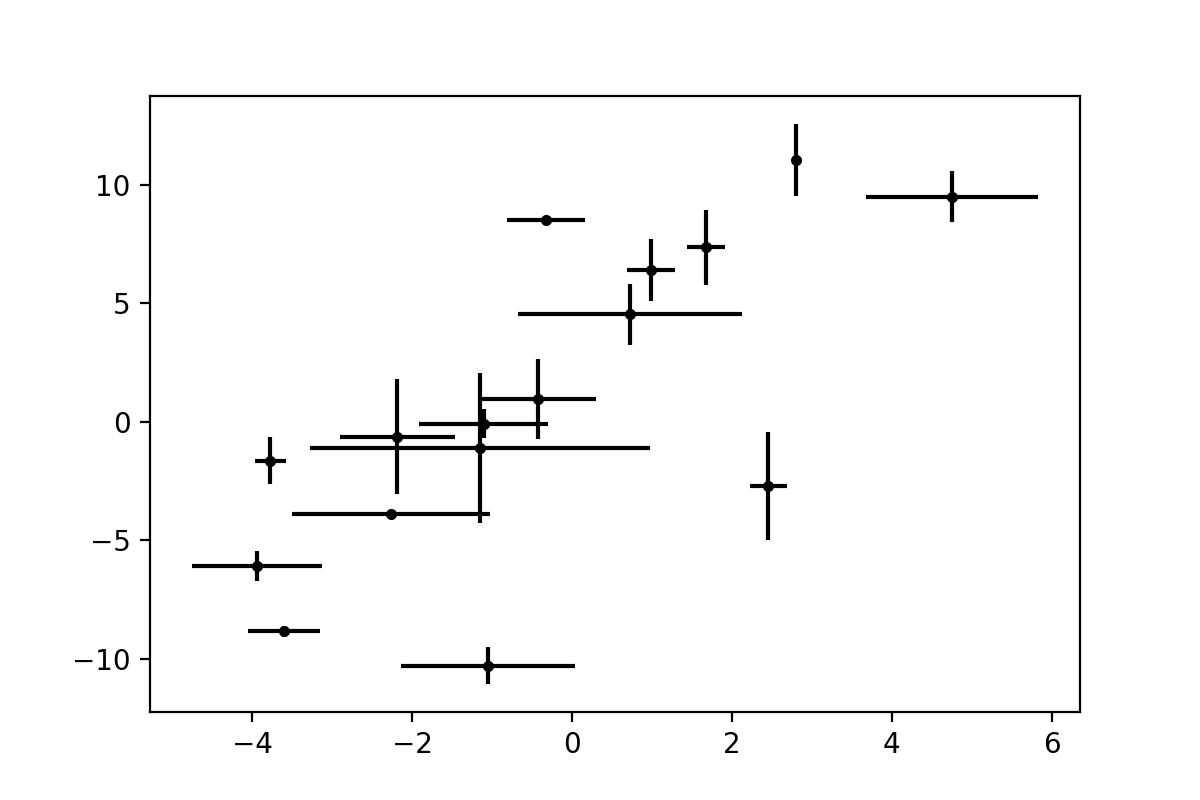

In [3]:
# Generating data:
numpoints = 16
np.random.seed(124)
input_x = np.random.uniform(-5,5,size=numpoints)
input_dx = abs(np.random.normal(0,1,size=numpoints))
input_y = input_x * 2.0 + 1.0 + np.random.normal(0,4,size=numpoints)
input_dy = abs(np.random.normal(0,1,size=numpoints)) * 2

plt.figure(figsize=(6,4))
plt.errorbar(input_x,input_y,input_dy,input_dx,fmt='.k');

In [4]:
def correlation_test(data_x,data_dx,data_y,data_dy,niter):
    """
    Function to estimate the correlation tests for data with uncertainties
    and plotting the results.
    
    This function simply mocs the data for 'niter' times based on 
    data values and uncertainties (assuming normal distributions) and runs the
    tests for every iteration. 
    
    Produces distributions of values for correlation tests and returns the observed
    correlation value and the std of the distribution for the simulations.
    
    """
    corr_pearson_coef = []
    corr_pearson_p = []
    corr_spearman_rank = []
    corr_spearman_p = []
    corr_kendall_tau = []
    corr_kendall_p = []
    
    plt.figure(figsize=(6,4))
    plt.errorbar(data_x,data_y,data_dy,data_dx,fmt='.k',alpha=1.0)
    
    for i in range(niter): 
        moc_x = np.random.normal(loc=data_x,scale=data_dx)
        moc_y = np.random.normal(loc=data_y,scale=data_dy)
        plt.plot(moc_x,moc_y,'.r',alpha=0.5,ms=0.1)
        corr_pearson_coef.append(pearsonr(moc_x,moc_y)[0])
        corr_spearman_rank.append(spearmanr(moc_x,moc_y)[0])
        corr_kendall_tau.append(kendalltau(moc_x,moc_y)[0])   
        corr_pearson_p.append(pearsonr(moc_x,moc_y)[1])
        corr_spearman_p.append(spearmanr(moc_x,moc_y)[1])
        corr_kendall_p.append(kendalltau(moc_x,moc_y)[1])

    plt.figure(figsize=(6,4))
    plt.title('Correlation rank/score')
    plt.hist(corr_pearson_coef,edgecolor='w',label='Pearson R')
    plt.hist(corr_spearman_rank,edgecolor='w',alpha=0.5,label='Spearman Rank')
    plt.legend()
       
    print('For the actual data:')
    print('Pearson R:',pearsonr(data_x,data_y)[0],', NHP: ',pearsonr(data_x,data_y)[1])
    print('Spearman Rank:',spearmanr(data_x,data_y)[0],', NHP: ',spearmanr(data_x,data_y)[1])
    print('\nFor the simulations:')
    print('Pearson R:',np.average(corr_pearson_coef),'+/-',np.std(corr_pearson_coef))
    print('Spearman Rank:',np.average(corr_spearman_rank),'+/-',np.std(corr_spearman_rank))
    return pearsonr(data_x,data_y)[0],np.std(corr_pearson_coef),spearmanr(data_x,data_y)[0],np.std(corr_spearman_rank)

<IPython.core.display.Javascript object>


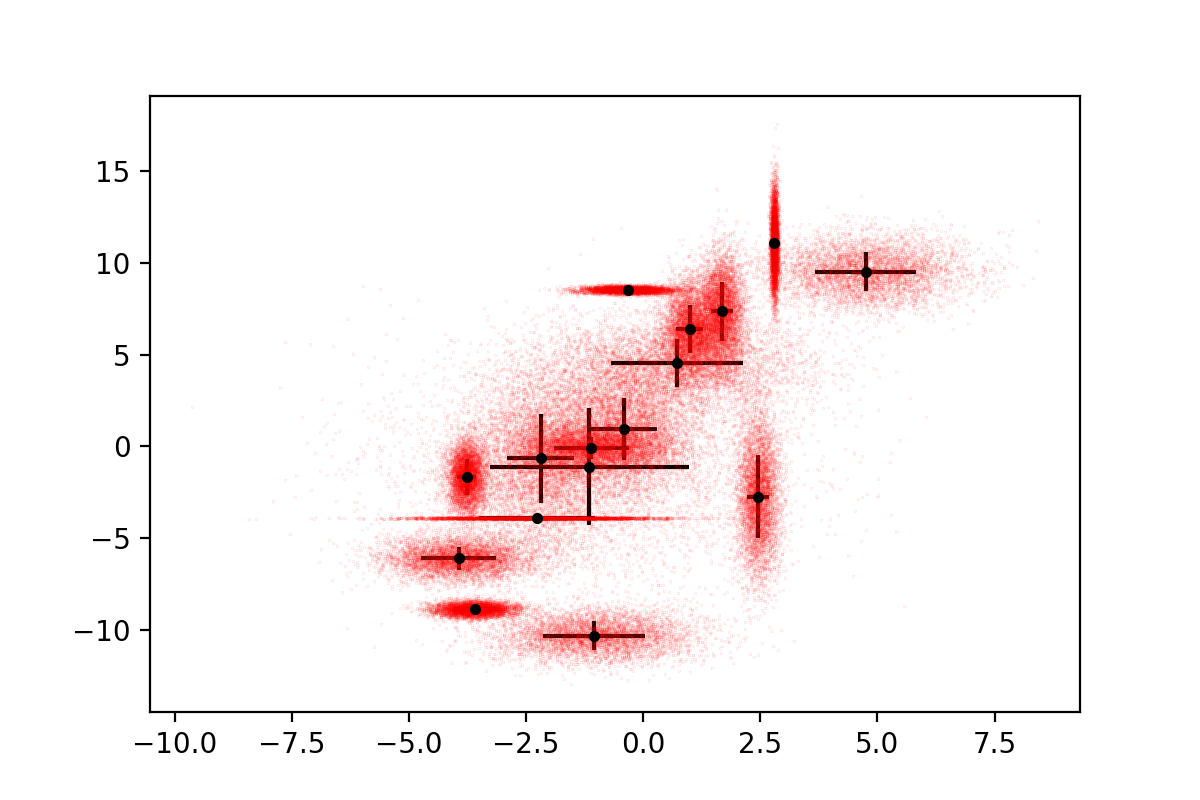

<IPython.core.display.Javascript object>


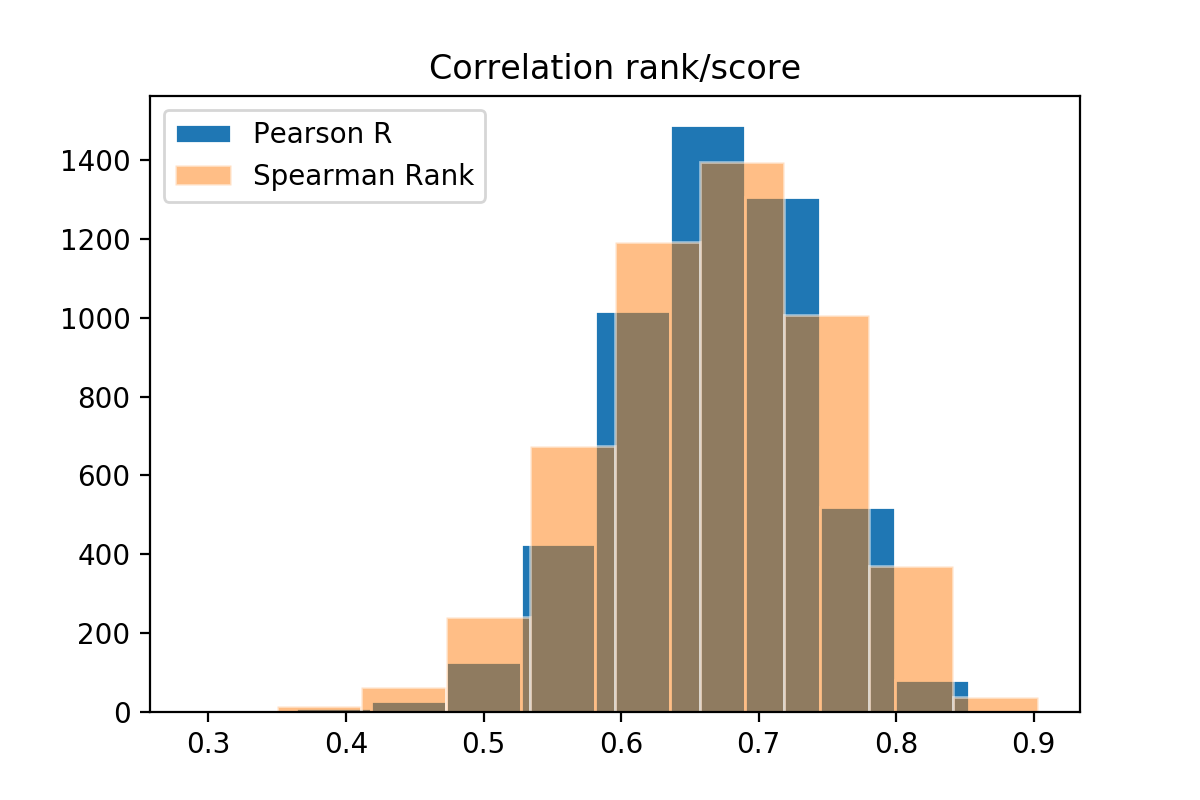

For the actual data:
Pearson R: 0.7224366994457632 , NHP:  0.0015723682289564879
Spearman Rank: 0.7294117647058823 , NHP:  0.0013430786823836695

For the simulations:
Pearson R: 0.6646413104680962 +/- 0.06981739843646508
Spearman Rank: 0.66714 +/- 0.08421916325174175


(0.7224366994457632,
 0.06981739843646508,
 0.7294117647058823,
 0.08421916325174175)

In [5]:
correlation_test(input_x,input_dx,input_y,input_dy,5000)